In [2]:
import tensorflow as tf
from  tensorflow.keras import models,layers
data=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
shuffle=True,
image_size=(256,256),
batch_size=32
)


Found 2475 files belonging to 2 classes.


In [3]:
class_names=data.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [4]:
def get_data_partition(ds,train_split=0.8,test_split=0.1,validation_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(validation_split*ds_size)    

    train_data=ds.take(train_size)

    val_data=ds.skip(train_size).take(val_size)
    test_data=ds.skip(train_size).skip(val_size)

    return train_data,test_data,val_data

In [5]:
train_data,test_data,val_data=get_data_partition(data)

In [6]:
len(train_data)

62

In [7]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [9]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [10]:
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')
])
model.build(input_shape=(32,256,256,3))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [12]:
model.compile(optimizer='Adam',               # Optimizer: Adam
              loss= 'sparse_categorical_crossentropy', # Loss function: Sparse categorical crossentropy
              metrics=['accuracy']) 

In [13]:
history=model.fit(train_data,epochs=50,batch_size=10,verbose=1,validation_data=val_data)

Epoch 1/50
62/62 [==============================] - 185s 3s/step - loss: 0.6311 - accuracy: 0.6388 - val_loss: 0.7216 - val_accuracy: 0.6652
Epoch 2/50
62/62 [==============================] - 150s 2s/step - loss: 0.3936 - accuracy: 0.8650 - val_loss: 0.3789 - val_accuracy: 0.9420
Epoch 3/50
62/62 [==============================] - 144s 2s/step - loss: 0.1470 - accuracy: 0.9557 - val_loss: 0.2086 - val_accuracy: 0.9866
Epoch 4/50
62/62 [==============================] - 135s 2s/step - loss: 0.0587 - accuracy: 0.9847 - val_loss: 0.2315 - val_accuracy: 0.9554
Epoch 5/50
62/62 [==============================] - 131s 2s/step - loss: 0.0642 - accuracy: 0.9868 - val_loss: 0.0397 - val_accuracy: 0.9955
Epoch 6/50
62/62 [==============================] - 153s 2s/step - loss: 0.0390 - accuracy: 0.9918 - val_loss: 0.1368 - val_accuracy: 0.9911
Epoch 7/50
62/62 [==============================] - 160s 3s/step - loss: 0.0519 - accuracy: 0.9873 - val_loss: 0.0769 - val_accuracy: 0.9911
Epoch 8/50
62

In [14]:
history

In [15]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 62}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [18]:
len(val_acc)

50

In [19]:
len(acc)

50

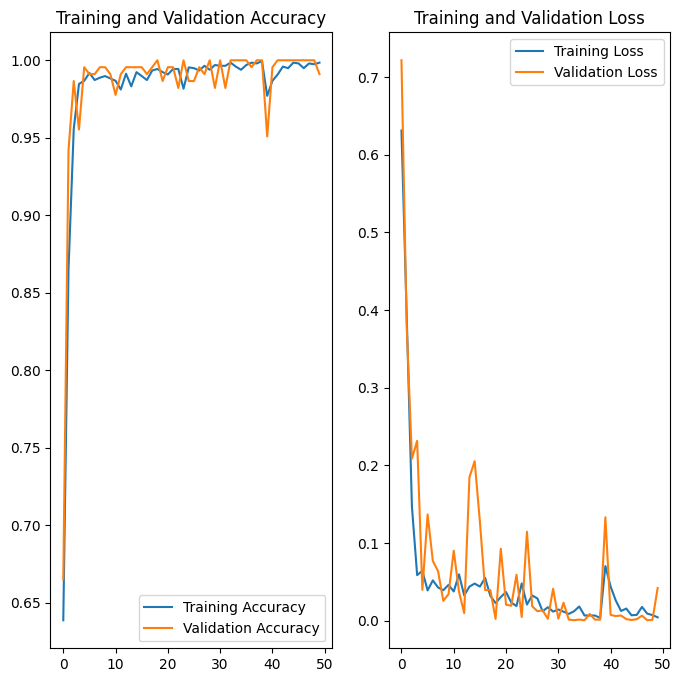

In [20]:
import matplotlib.pyplot as plt

EPOCHS=50
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pepper__bell___Bacterial_spot
1/1 [==============================] - 2s 2s/step
predicted label: Pepper__bell___Bacterial_spot


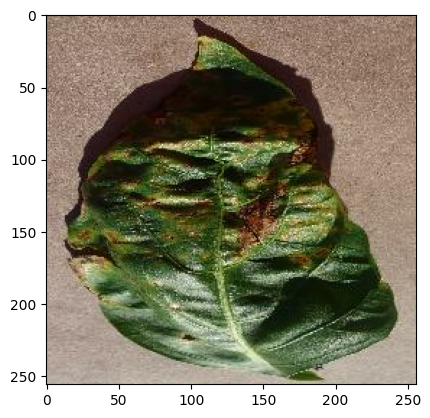

In [21]:
import numpy as np
for images_batch, labels_batch in test_data.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 94ms/step


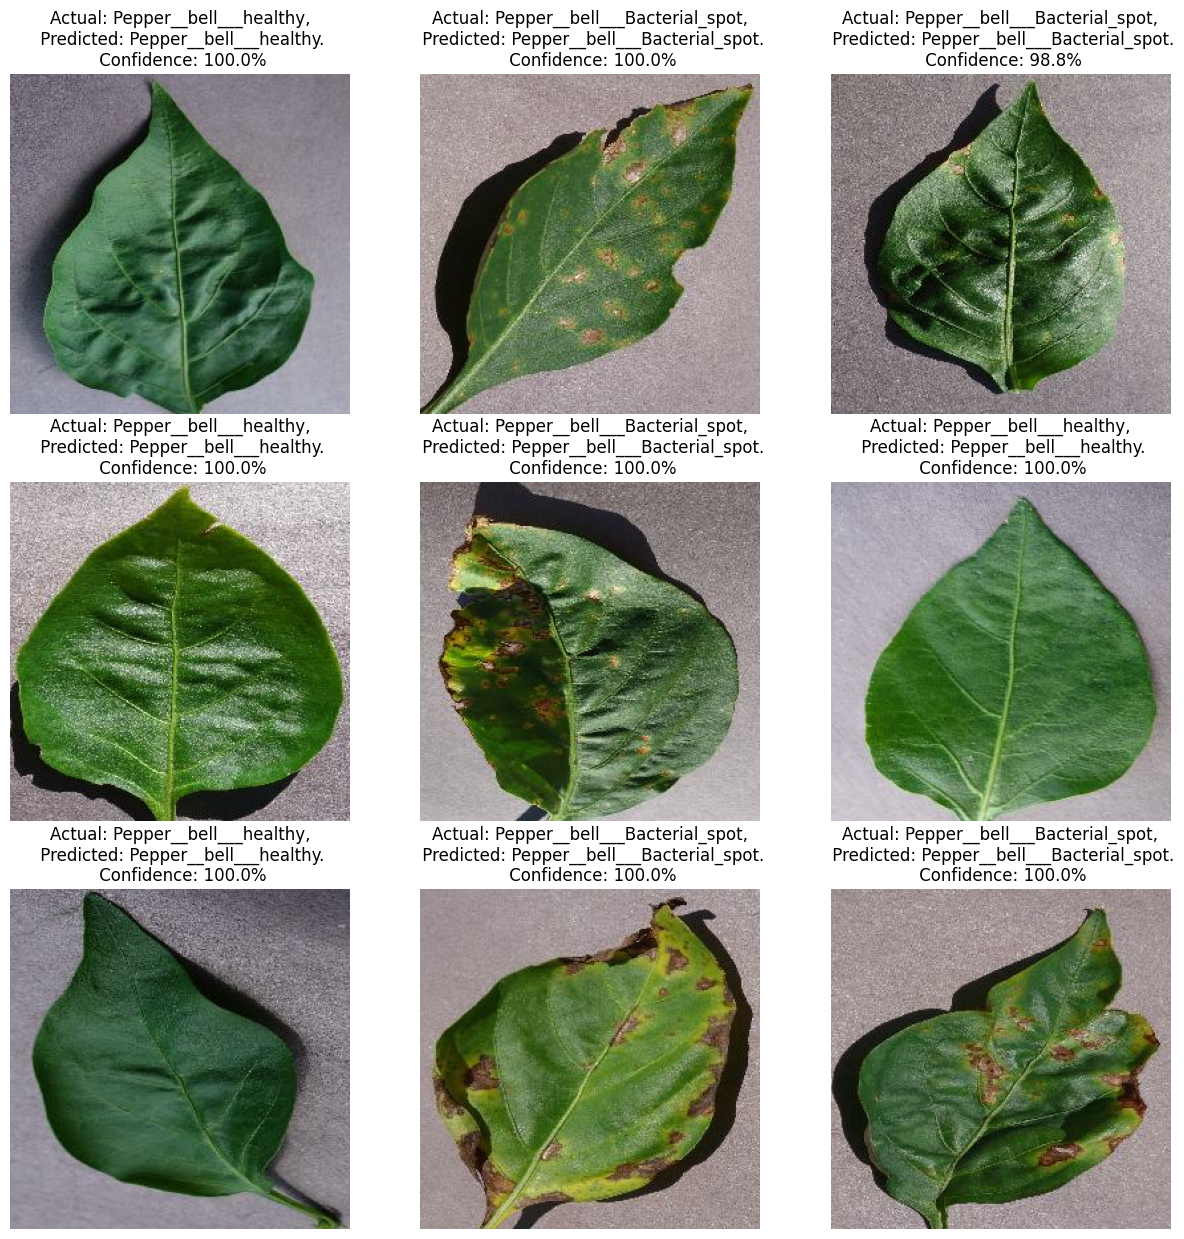

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [24]:
scores=model.evaluate(test_data)

9/9 [==============================] - 5s 544ms/step - loss: 0.0111 - accuracy: 0.9931


1/1 [==============================] - 0s 63ms/step


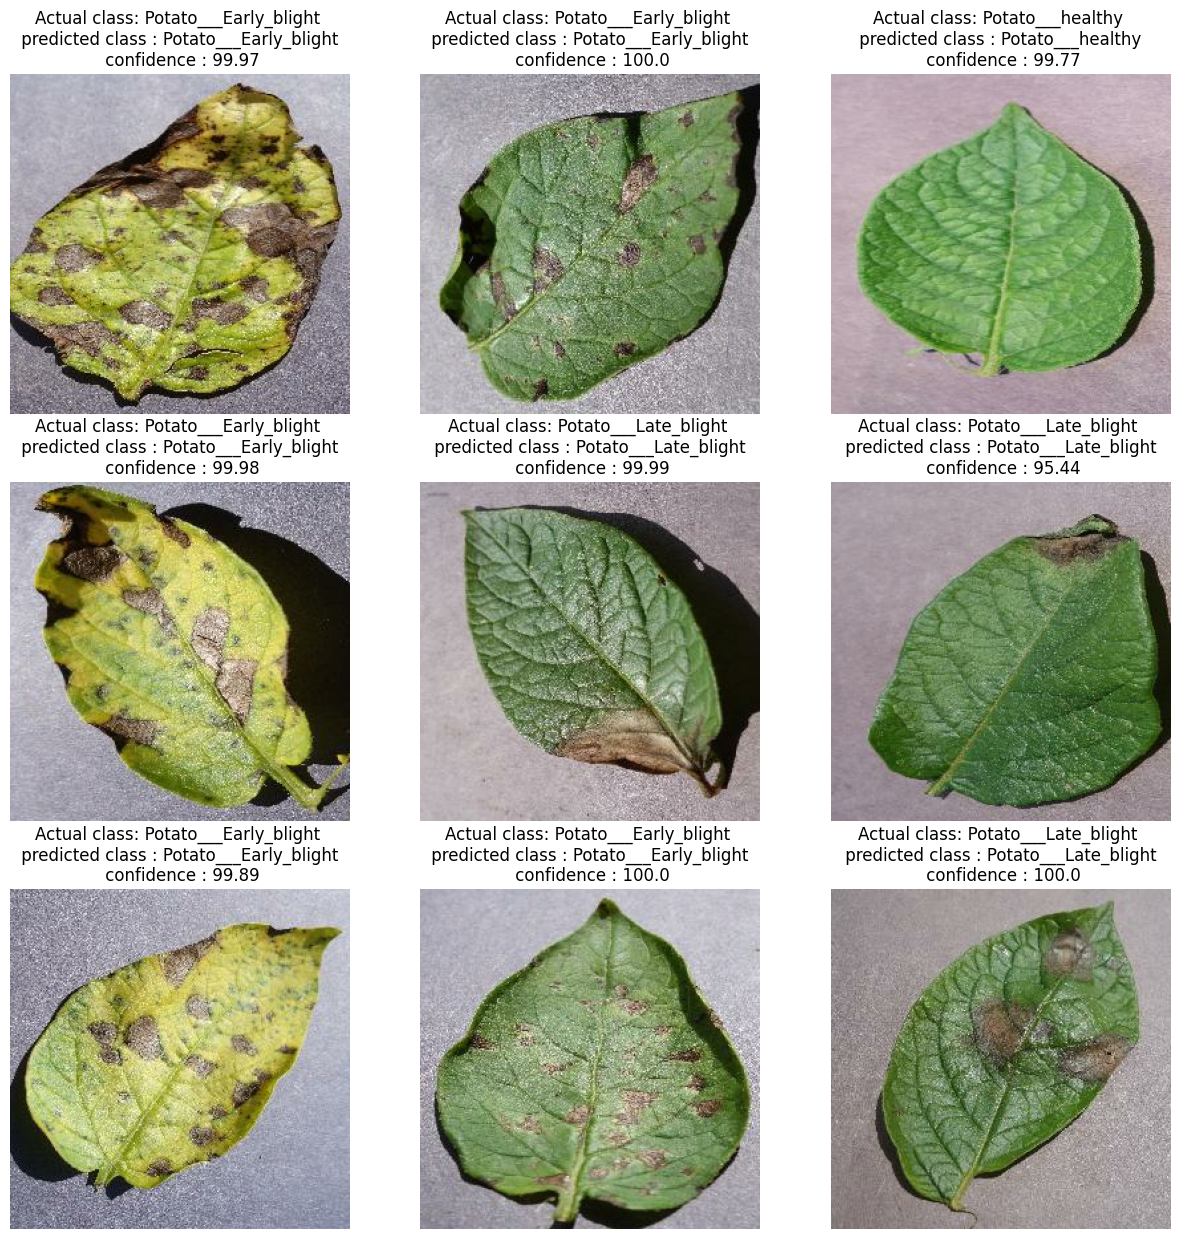

INFO:tensorflow:Assets written to: saved_models/3\assets


INFO:tensorflow:Assets written to: saved_models/3\assets


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
